In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

# Chạy hồi quy trên CSDL California Housing



## Đọc file csv sử dụng pandas

In [ ]:
help (pd.read_csv)

In [3]:
housing = pd.read_csv("housing.csv") 

In [ ]:
housing.shape

(20640, 10)

In [4]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.isna().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Điền đầy dữ liệu trống bằng cách lấy trung bình

In [7]:
median_bedrooms = np.median(housing['total_bedrooms'][housing['total_bedrooms'].notna()==True])

# data['total_bedrooms'].fillna(median_bedrooms, inplace=True)

In [12]:
median_bedrooms

435.0

In [6]:
housing['total_bedrooms'].fillna(median_bedrooms, inplace=True)


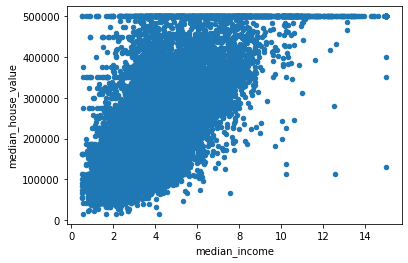

In [ ]:
housing.plot.scatter("median_income", "median_house_value")

# Tách dữ liệu thành tập train/test với biến đầu vào là median_income

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [87]:
X = np.array(housing.median_income).reshape((-1,1))
y = np.array(housing.median_house_value)
x_train, x_test,y_train, y_test = train_test_split(X,y, test_size=0.5)

In [ ]:

X = np.array(housing[::-2]).reshape((-1,1))
y = np.array(housing.median_house_value)
x_train, x_test,y_train, y_test = train_test_split(X,y, test_size=0.5)

In [114]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [115]:
labels = ['longitude', 'latitude','total_rooms','housing_median_age','total_rooms','population','households','median_income']
X = np.array(housing[labels])
x_train, x_test,y_train, y_test = train_test_split(X,y, test_size=0.5)

In [116]:
x_train.shape, x_test.shape

((10320, 8), (10320, 8))

##Fitting sử dụng LinearRegression, đánh giá kết quả sử dụng RMSE và R-squared



In [117]:
def rmse(y1, y2):
    return np.sqrt(((y1-y2)**2).mean())

In [118]:
reg = LinearRegression()
reg.fit(x_train,y_train)
pred = reg.predict(x_test)
pred_train = reg.predict(x_train)

In [119]:
y_test, pred

(array([139700., 120400., 128600., ..., 221300.,  97700., 283200.]),
 array([211014.42906287, 174536.62305325, 183555.86989177, ...,
        222564.58507115,  56685.11992152, 271188.18493183]))

In [120]:
r2_score(pred,y_test)

0.4244147110275901

In [121]:
rmse(pred, y_test)

70684.59087178517

In [122]:
reg = Ridge(alpha=1000)
reg.fit(x_train,y_train)
pred = reg.predict(x_test)
pred_train = reg.predict(x_train)
rmse(pred, y_test)

71195.75028819831

In [123]:
rmse_trains=[]
rmse_tests=[]
alphas = []
for mu in range(-20,40):
  alpha = 10**(mu/10)
  alphas.append(alpha)
  reg = Lasso(alpha=alpha)
  reg.fit(x_train,y_train)
  pred = reg.predict(x_test)
  pred_train = reg.predict(x_train)
  rmse_tests.append(rmse(pred, y_test))
  rmse_trains.append(rmse(pred_train, y_train))

In [124]:
reg.coef_

array([-1.22151112e+04, -1.40825966e+04, -1.01379027e+01,  1.60911108e+03,
        3.13698710e+00, -5.22247582e+01,  2.07121742e+02,  4.05594042e+04])

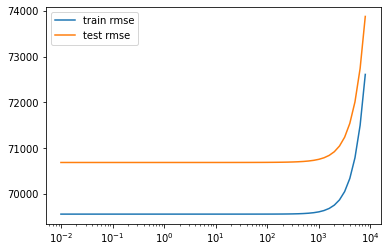

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas,rmse_trains, label='train rmse')
ax.plot(alphas,rmse_tests,label='test rmse')
ax.set_xscale('log')
plt.legend()

In [126]:
rmse_trains=[]
rmse_tests=[]
alphas = []
for mu in range(-20,40):
  alpha = 10**(mu/10)
  alphas.append(alpha)
  reg = Ridge(alpha=alpha)
  reg.fit(x_train,y_train)
  pred = reg.predict(x_test)
  pred_train = reg.predict(x_train)
  rmse_tests.append(rmse(pred, y_test))
  rmse_trains.append(rmse(pred_train, y_train))

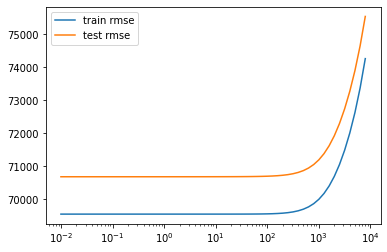

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas,rmse_trains, label='train rmse')
ax.plot(alphas,rmse_tests,label='test rmse')
ax.set_xscale('log')
plt.legend()

##So sánh với Ridge và Lasso, vẽ kết quả minh họa


## Điều chỉnh tham số của Ridge và Lasso

In [128]:
coeffs=[]
alphas = []
for mu in range(-20,60):
  alpha = 10**(mu/10)
  alphas.append(alpha)
  reg = Lasso(alpha=alpha)
  reg.fit(x_train,y_train)
  coeffs.append(reg.coef_)

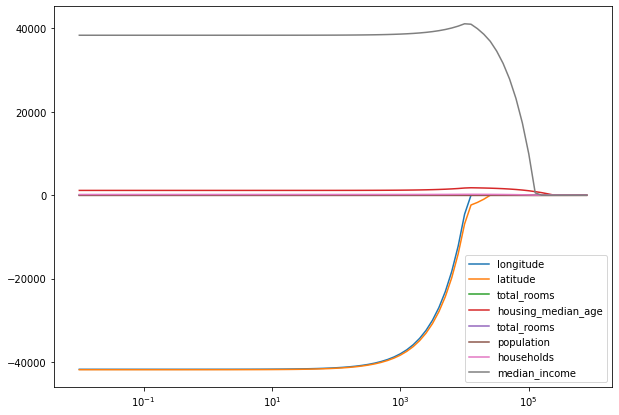

In [132]:
coeffs = np.array(coeffs)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
num_coefs = len(coeffs[0])
for coef in range(num_coefs):
  coefs = coeffs[:,coef]
  ax.plot(alphas,coefs,label=labels[coef])
ax.set_xscale('log')
plt.legend()

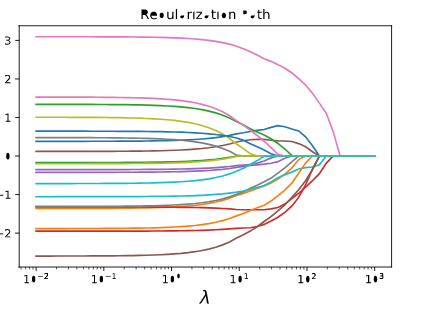

## Grid search sử dụng Ridgecv và LassoCV

## Fitting sử dụng tất cả các trường làm biến đầu vào

## Sử dụng Lasso đánh giá tương quan giữa các cột (biến độc lập) đến kết quả (biến phụ thuộc)

## Chuẩn hóa các cột về mean = 0 , std = 1, chạy lại và đánh giá kết quả

---



## Lập trình lại KNN cho bài toán regression

# Sử dụng SVM trong Sklearn, lập trình cho bài toán regression (SVR)
